# Tarea 2

# Tarea 2

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [2]:
function histograma(A::Array,N::Int)
    # Queremos ir contando cuantos números caen en cada intervalo antes de saber cuales son los intervalos, 
    # así que necesitamos ir modificando los intervalos conforme obtenemos mas información.
    # ¿Pero se puede hacer sin aceptar un error estadístico?
    # creo que no, no se me ocurre como, así que lo haré en dos pases en lugar de uno,

    
    sup,inf=extrema(A); #primer pase para encontrar el sup y el inf :(
    
    bins=zeros(Int,N+2);
    
    rng=(sup-inf)/N;
    
    for a in A #segundo pase
        bins[ceil(Int,((a-inf)/rng))+1]+=1
    end
    
    deleteat!(bins,N+2)
    deleteat!(bins,1)
    bins[1]+=1
    
    return bins    
end

histograma (generic function with 1 method)

In [14]:
#probando la funcion
histograma(randn(1000),10)

10-element Array{Int64,1}:
   3
  10
  50
 118
 222
 263
 182
 103
  40
   9

In [ ]:
#Datos para graficar
n=10000
lista=randn(n)

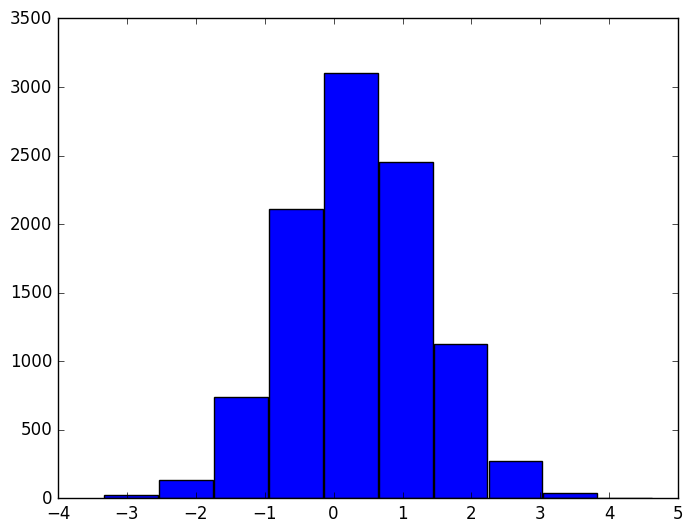

(PyObject <matplotlib.patches.Rectangle object at 0x000000001AE1ACF8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE62E48>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE754E0>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE7CA58>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE7CFD0>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE84898>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE8BDD8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE8B240>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE909E8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001AE90C18>)

In [83]:
#Gráficas Histograma
N=10
sup,inf=extrema(lista);
rng=(sup-inf)/N;

X=[inf]
for i=1:N-1
    push!(X,inf+(i*rng))
end
using PyPlot
bar(X,histograma(lista,N),width=.78,align="center")

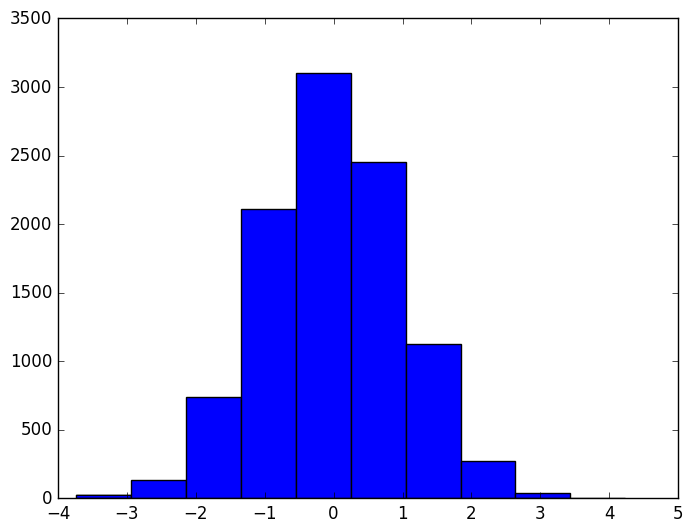

([23.0,132.0,739.0,2107.0,3101.0,2455.0,1128.0,272.0,40.0,3.0],[-3.732528249760687,-2.9360067267164043,-2.139485203672122,-1.3429636806278396,-0.5464421575835567,0.25007936546072607,1.046600888505008,1.8431224115492908,2.6396439345935736,3.4361654576378564,4.232686980682139],Any[PyObject <matplotlib.patches.Rectangle object at 0x000000001AE9BE48>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2AE940>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2BDBA8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2BD828>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2CAAC8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2D0A58>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2CAE48>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2CA518>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2C07F0>,PyObject <matplotlib.patches.Rectangle object at 0x000000001B2D0198>])

In [84]:
#Histograma de PyPlot
plt[:hist](lista,N)

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [51]:
#Mean
function meanb(A::Array)
    sum(A)/length(A)
end
print("Mean de funcion hecha a mano:\t",meanb(histograma(lista,N)),"\n")
print("Mean de funcion de julia:\t",mean(histograma(lista,N)))

Mean de funcion hecha a mano:	1000.0
Mean de funcion de julia:	1000.0

In [52]:
#Var
function varb(A::Array)
    m=meanb(A)
    sumabs2(A-m)/(length(A)-1)
end
print("Var de funcion hecha a mano:\t",varb(histograma(lista,N)),"\n")
print("Var de funcion de julia:\t",var(histograma(lista,N)))

Var de funcion hecha a mano:	1.102561111111111e6
Var de funcion de julia:	1.102561111111111e6

In [8]:
#Algoritmo recursivo from Wikipedia
function online_variance(data)
    n = 0
    mean = 0.0
    M = 0.0
     
    for x in data
        n += 1
        delta = x - mean
        mean += delta/n
        M += delta*(x - mean)
    end
    
    if n<2
        error("n<2")
    else
        return M/(n-1)
    end
end
online_variance(histograma(lista,N))

1.1235986666666667e6

In [9]:
#velocity comparation
for i=1:7
        m=10^i
        A=randn(m)
        
        print (m," datos \n")
        print ("  varb--  ")
        @time varb(A)
        print ("  var--   ")
        @time var(A)
        print ("  online--")
        @time online_variance(A)
        print ("\n")
end

10 datos 
  varb--    0.000002 seconds (1 allocation: 144 bytes)
  var--     0.048700 seconds (1.11 k allocations: 58.594 KB)
  online--  0.000001 seconds

100 datos 
  varb--    0.006920 seconds (1 allocation: 896 bytes)
  var--     0.000005 seconds (3 allocations: 112 bytes)
  online--  0.000001 seconds

1000 datos 
  varb--    0.000005 seconds (1 allocation: 7.891 KB)
  var--     0.000002 seconds (3 allocations: 112 bytes)
  online--  0.000010 seconds

10000 datos 
  varb--    0.000039 seconds (2 allocations: 78.188 KB)
  var--     0.000013 seconds (3 allocations: 112 bytes)
  online--  0.001969 seconds

100000 datos 
  varb--    0.001126 seconds (2 allocations: 781.313 KB)
  var--     0.000296 seconds (3 allocations: 112 bytes)
  online--  0.001386 seconds

1000000 datos 
  varb--    0.015332 seconds (2 allocations: 7.629 MB)
  var--     0.008321 seconds (3 allocations: 112 bytes)
  online--  0.014235 seconds

10000000 datos 
  varb--    0.133029 seconds (2 allocations: 76.294 MB)


In [ ]:
#Con 10000000 datos la función que trae Julia es las menos lenta

### 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [67]:
function simpsoms(f,a,b,n)
    if isodd(n)
        error("N is odd number")
    end
    d=(b-a)/n
    I=f(a)+f(b)
    for i=1:n-1
        I+=(f(a+(d*i)))*(3+((-1)^(i+1)))
    end
    I*(d/3)
end
#Test
f(x)=1/(1+(x^5))
simpsoms(f,0,3,10000)

1.065878542502973